## Springfield, MO Crime Dataset: Basic Analysis

The basic Analysis notebook covers basic plotting methods for visualing the dataset.  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_pickle('data/Dataframe.pkl')

In [3]:
def getReportNames(df = df):
    '''returns a list of police report types that can be analyzed'''
    return list(df.index)

In [4]:
def incident_total(incident, df = df, Byear = 2004, Eyear = 2016):
    '''returns the total number of reports between years'''
    return df.ix[incident,Byear:Eyear].sum()
#report_total('Suicide')
#df.ix['Suicide'].sum()
incident_total('Suicide',Eyear = 2005)

145

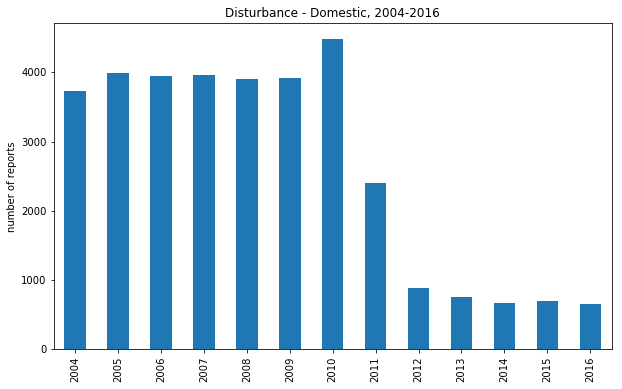

In [5]:
def bar_plot_by_year(name):
    '''returns the total number of reports between years as a bar plot'''
    return pd.Series((df[year].ix[name].sum() for year in range(2004,2017)), 
                     index = [[i for i in range(2004,2017)]]).plot.bar(use_index = True, 
                                                                       title = name + ', 2004-2016',
                                                                      figsize = (10,6)).set_ylabel("number of reports")
bar_plot_by_year('Disturbance - Domestic')

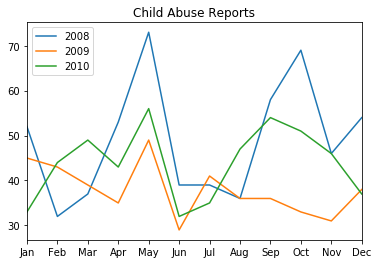

In [6]:
def plot_year(name,year):
    '''plot year as a line plot'''
    return df[year].ix[name].plot(legend = True, label = year, xticks = range(0,12),title = name + ' Reports')

for year in range(2008,2011):
    plot_year('Child Abuse', year)

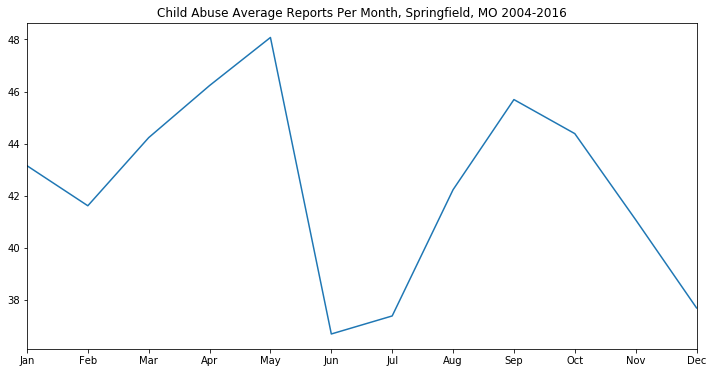

In [8]:
def average_by_month(incident, month):
    '''return the mean of a given month'''
    return df.ix[incident][:,month].mean()

def plot_monthly_averages(incident):
    '''returns a bar plot of monthly averages for the requested report type'''
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    result =[]
    plt.figure()
    for month in months:
        result.append(average_by_month(incident,month))
    pd.Series(result, index = months).plot(xticks = range(0,12),
                                           title = incident + ' Average Reports Per Month, Springfield, MO 2004-2016',
                                           figsize=(12,6))
def plot_yearly_averages(incident):
    '''plots the average number of reports per month in each year'''
    result = []
    for year in range(2004,2017):
        result.append(df[year].ix[incident].mean())
    pd.Series(result,index = [i for i in range(2004,2017)]).plot(legend = True, label = incident,xticks = range(2004,2017),
                                                                 title= 'Average reports per month by year',
                                                                figsize = (12,6))
    
plot_monthly_averages('Child Abuse')

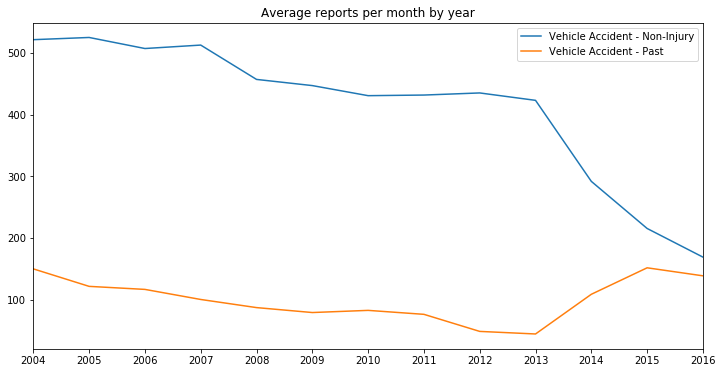

In [76]:
plot_yearly_averages('Vehicle Accident - Non-Injury')
plot_yearly_averages('Vehicle Accident - Past')


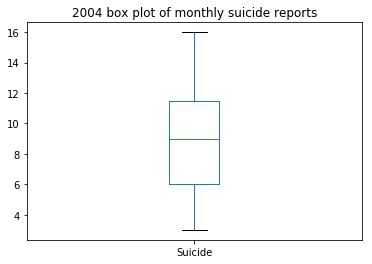

In [75]:
df.ix['Suicide',2004].plot.box(title = '2004 box plot of monthly suicide reports')